In [1]:
'''Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent 
variable.'''

# Import the libraries needed and load the boston dataset to a dataframe

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
%matplotlib inline
boston=load_boston()
bos=pd.DataFrame(boston.data)
bos.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
# Display the shape of the dataframe

bos.shape

(506, 13)

In [3]:
# Print the details of the dataset

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
# Assign the feature names of the dataset to the column names of the dataframe. 

bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Add Price as part of the dataframe

bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Get the statistical details of the data

print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

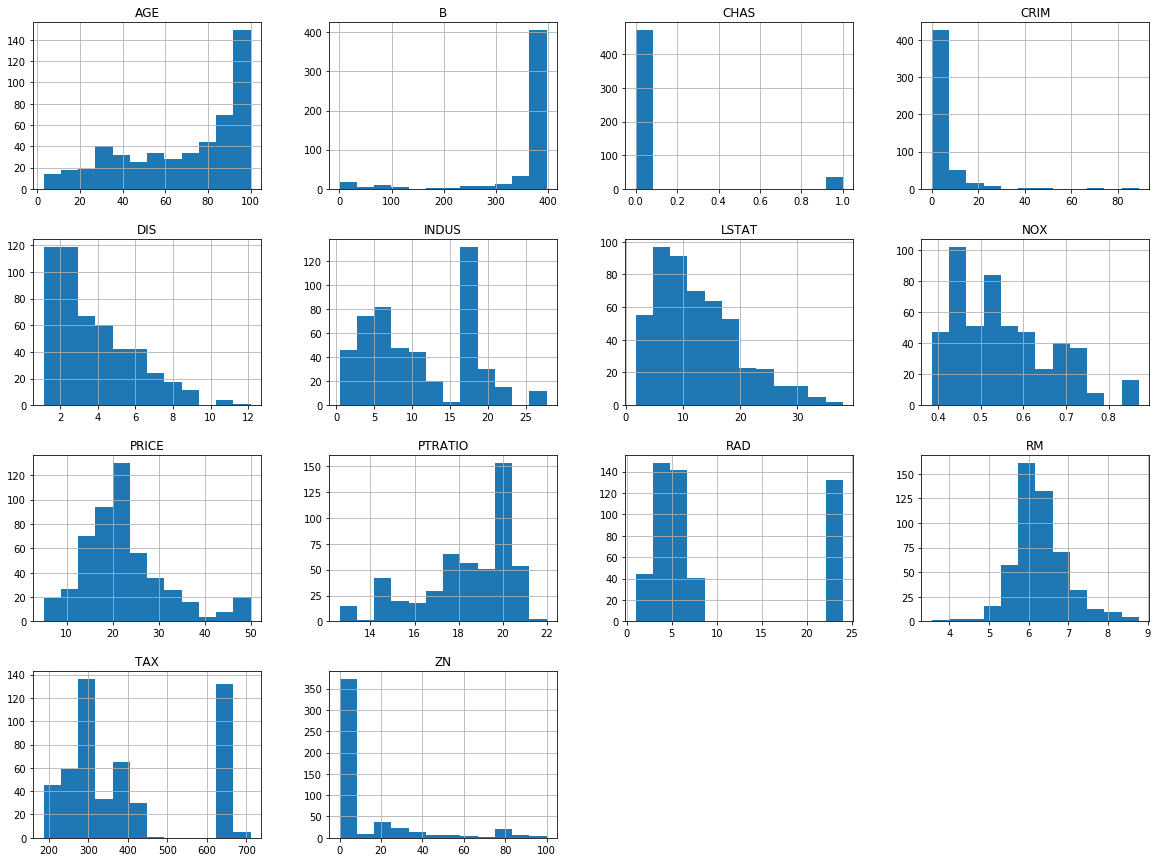

In [7]:
# Show the distribution of the parameters

bos.hist(bins=12,figsize=(20,15))
plt.show()

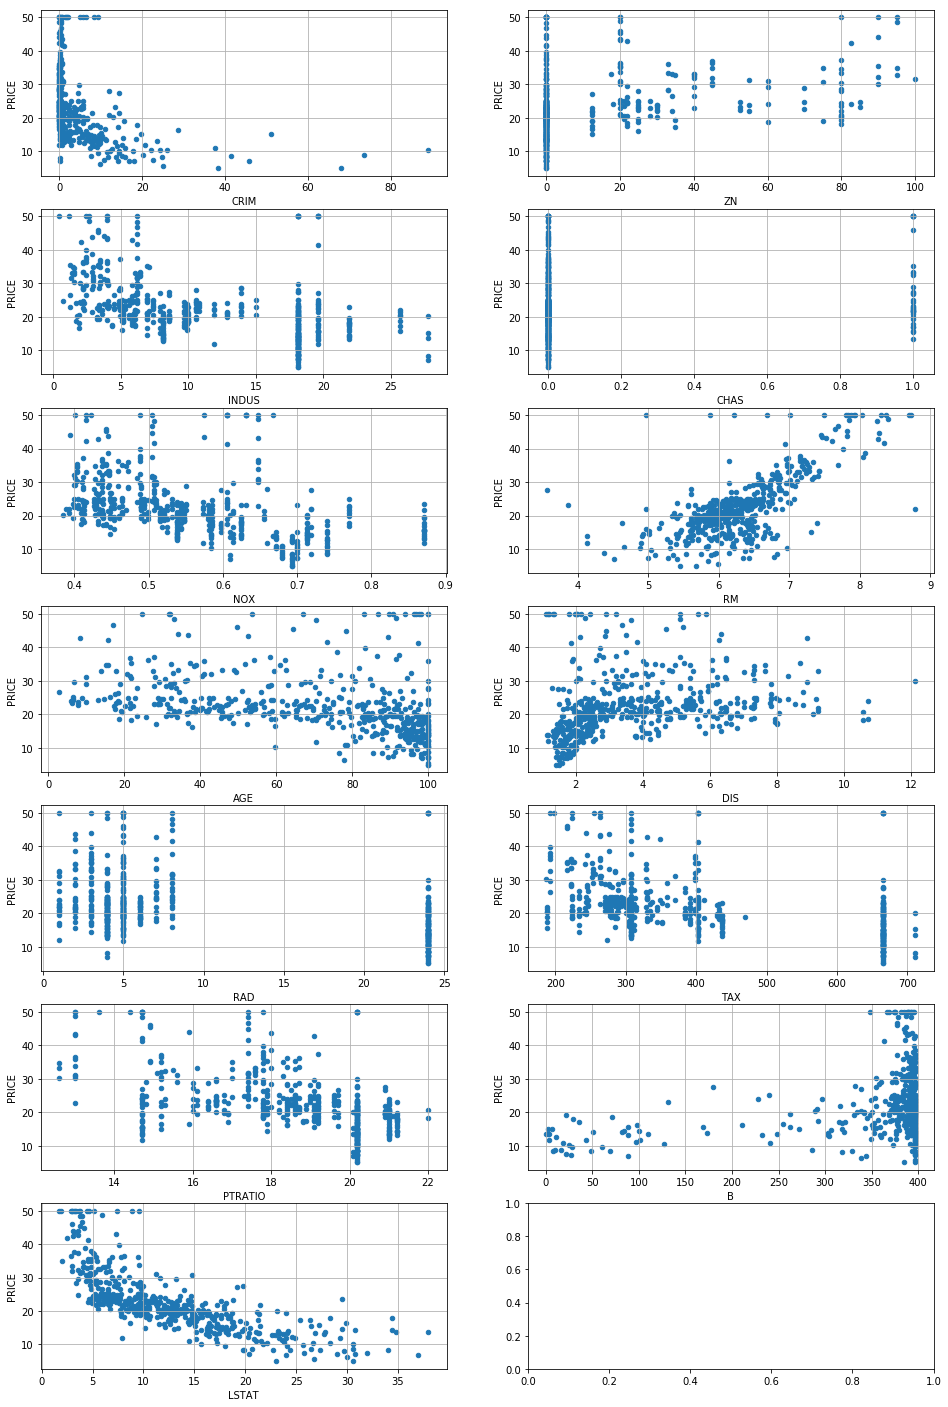

In [8]:
# Display Price as a dependant variable of the different parameters

fig, axs = plt.subplots(7, 2 , sharey=False)
bos.plot(kind='scatter', x=bos.columns[0], y='PRICE', ax=axs[0][0] , figsize=(16,25) , grid=True )
bos.plot(kind='scatter', x=bos.columns[1], y='PRICE', ax=axs[0][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[2], y='PRICE', ax=axs[1][0], grid=True)
bos.plot(kind='scatter', x=bos.columns[3], y='PRICE', ax=axs[1][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[4], y='PRICE', ax=axs[2][0], grid=True)
bos.plot(kind='scatter', x=bos.columns[5], y='PRICE', ax=axs[2][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[6], y='PRICE', ax=axs[3][0], grid=True)
bos.plot(kind='scatter', x=bos.columns[7], y='PRICE', ax=axs[3][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[8], y='PRICE', ax=axs[4][0], grid=True)
bos.plot(kind='scatter', x=bos.columns[9], y='PRICE', ax=axs[4][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[10], y='PRICE', ax=axs[5][0], grid=True)
bos.plot(kind='scatter', x=bos.columns[11], y='PRICE', ax=axs[5][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[12], y='PRICE', ax=axs[6][0], grid=True)
plt.show()


In [9]:
# Split the data into 2 dataframes - one for parameters and the other for price. 

X=bos.drop('PRICE',axis=1)
Y=boston.target
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Split the data into Train and Test

from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [11]:
# Create a Stats model for the data. 

import statsmodels.api as sm
train_x = sm.add_constant(X_train)
test_x = sm.add_constant(X_test)
model = sm.OLS(Y_train, X_train).fit()

In [12]:
# Display the model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     691.3
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          2.01e-260
Time:                        10:19:55   Log-Likelihood:                -1223.2
No. Observations:                 404   AIC:                             2472.
Df Residuals:                     391   BIC:                             2524.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1273      0.038     -3.349      0.001      -0.202      -0.053
ZN             0.0537      0.017      3.234      0.001       0.021       0.086
INDUS         -0.0263      0.076     -0.345      0.730      -0.176       0.123
CHAS           2.8865      1.040      2.775      0.006       0.842       4.931
NOX           -0.3655      4.042     -0.090      0.928      -8.312       7.581
RM             5.5714      0.353     15.795      0.000       4.878       6.265
AGE           -0.0049      0.015     -0.321      0.749      -0.035       0.025
DIS           -0.9816      0.231     -4.244      0.000      -1.436      -0.527
RAD            0.2171      0.079      2.733      0.007       0.061       0.373
TAX           -0.0098      0.005     -2.090      0.037      -0.019      -0.001
PTRATIO       -0.3655      0.125     -2.928      0.004      -0.611      -0.120
B              0.0181      0.003      5.847      0.000       0.012       0.024
LSTAT         -0.4928      0.059     -8.410      0.000      -0.608      -0.378
==============================================================================
Omnibus:                      148.569   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              904.025
Skew:                           1.435   Prob(JB):                    4.94e-197
Kurtosis:                       9.743   Cond. No.                     8.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Use Linear Regression on the data

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Coefficients of different parameters per the model

print('Coefficients of the parameters are: ')
lm.coef_

Coefficients of the parameters are: 


array([-1.30297070e-01,  4.93739220e-02,  1.52699792e-03,  2.70755661e+00,
       -1.60074619e+01,  3.40741645e+00,  1.18339212e-03, -1.49381089e+00,
        3.64266500e-01, -1.31647943e-02, -9.53457936e-01,  1.18685182e-02,
       -5.94883957e-01])

In [15]:
# Intercept of the model 

print('Intercept of the model: ')
lm.intercept_

Intercept of the model: 


37.95642143555605

In [16]:
# Score of the Train data

print('Score of the Train Data:')
lm.score(X_train, Y_train)

Score of the Train Data:


0.7383590299644472

In [17]:
# Score of the test Data

print('Score of the Test Data:')
lm.score(X_test, Y_test)

Score of the Test Data:


0.7330206818709294

Text(0.5,1,'Prices vs Predicted prices')

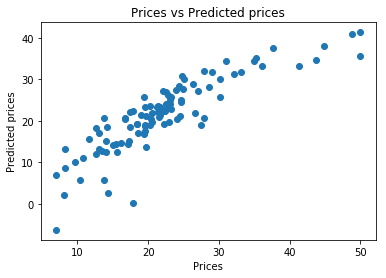

In [18]:
# Plot the predicted values. 

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

In [19]:
# Mean Square Error of the model

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean Square Error of the model = ' , mse)

Mean Square Error of the model =  20.902843680372875
